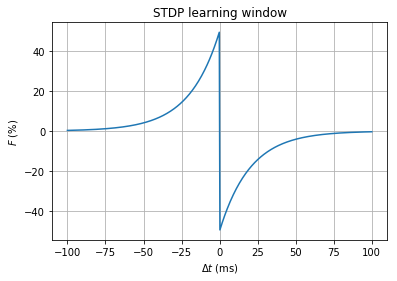

In [4]:
from pylab import *
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline 

tau = 20

A_plus, A_minus = (50, 50)

t = np.linspace(-100, 100, 500)

F = A_plus*np.exp(t[t < 0]/tau)
F = np.append(F, -A_minus*np.exp(-t[t >= 0]/tau))

plt.plot(t, F)
plt.title('STDP learning window')
plt.ylabel('$F$ (%)')
plt.xlabel('$\Delta t$ (ms)')
plt.grid()
plt.savefig('stdp_window.pdf')

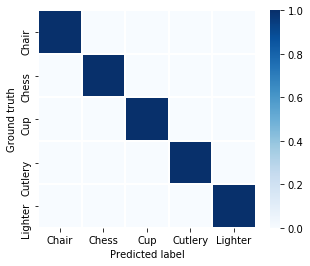

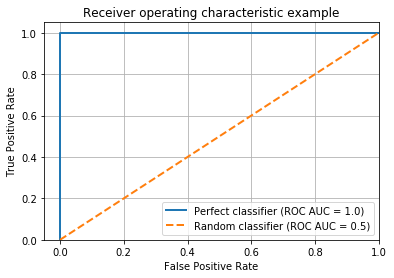

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc, confusion_matrix
%matplotlib inline 
y_test = [1,1,1,0,0,0]
y_predict = [1,1,1,0,0,0]
fpr, tpr, _ = roc_curve(y_test, y_predict)
classes = ['Chair', 'Chess', 'Cup', 'Cutlery', 'Lighter']
M = confusion_matrix(classes, classes)

plt.figure(figsize=(5,4))
sns.heatmap(M, linewidths=1, square=True, xticklabels=classes, yticklabels=classes, cmap='Blues')
#plt.title('Confusion matrix example')
plt.xlabel('Predicted label')
plt.ylabel('Ground truth')
plt.savefig('confusion_matrix.pdf')

lw = 2
plt.figure()
plt.plot(fpr, tpr, lw=lw, label='Perfect classifier (ROC AUC = 1.0)')
plt.plot([0, 1], [0, 1], lw=lw, linestyle='--', label='Random classifier (ROC AUC = 0.5)')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.grid()
plt.savefig('roc.pdf')

(49, 29, 48) (41, 14, 29) (32, 41, 33) (14, 17, 13)


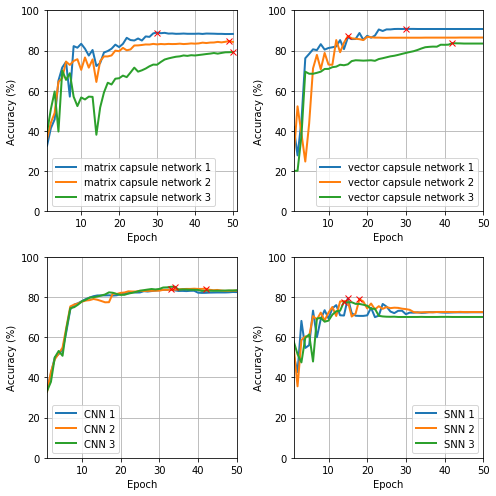

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import os
from sklearn.metrics import roc_curve, auc, confusion_matrix
%matplotlib inline
base_path = '../Matrix-Capsules-EM-PyTorch/results/'
cnn_curve1 = torch.load(os.path.join(base_path,'cnn_learning_curve1.pt'))
cnn_curve2 = torch.load(os.path.join(base_path,'cnn_learning_curve2.pt'))
cnn_curve3 = torch.load(os.path.join(base_path,'cnn_learning_curve3.pt'))
vector_curve1 = torch.load(os.path.join(base_path,'vector_learning_curve1.pt'))
vector_curve2 = torch.load(os.path.join(base_path,'vector_learning_curve2.pt'))
vector_curve3 = torch.load(os.path.join(base_path,'vector_learning_curve3.pt'))
matrix_curve1 = torch.load(os.path.join(base_path, 'matrix_learning_curve1.pt'))
matrix_curve2 = torch.load(os.path.join(base_path, 'matrix_learning_curve2.pt'))
matrix_curve3 = torch.load(os.path.join(base_path, 'matrix_learning_curve3.pt'))
snn_curve1 = torch.load(os.path.join(base_path, 'snn_learning_curve1.pt'))
snn_curve2 = torch.load(os.path.join(base_path, 'snn_learning_curve2.pt'))
snn_curve3 = torch.load(os.path.join(base_path, 'snn_learning_curve3.pt'))

matrix_max = (np.argmax(matrix_curve1[1]),np.argmax(matrix_curve2[1]),np.argmax(matrix_curve3[1]))
vector_max = (np.argmax(vector_curve1[1]),np.argmax(vector_curve2[1]),np.argmax(vector_curve3[1]))
cnn_max = (np.argmax(cnn_curve1[1]),np.argmax(cnn_curve2[1]),np.argmax(cnn_curve3[1]))
snn_max = (np.argmax(snn_curve1), np.argmax(snn_curve2), np.argmax(snn_curve3))

print(matrix_max,vector_max,cnn_max,snn_max)

plt.figure(figsize=(7,7))
# Plotting cnn
plt.subplot(223)
plt.plot(range(1,51), cnn_curve1[1], lw=2, label='CNN 1')
plt.plot(range(1,51), cnn_curve2[1], lw=2, label='CNN 2')
plt.plot(range(1,51), cnn_curve3[1], lw=2, label='CNN 3')
plt.plot(cnn_max[0]+1, cnn_curve1[1][cnn_max[0]], 'rx')
plt.plot(cnn_max[1]+1, cnn_curve2[1][cnn_max[1]], 'rx')
plt.plot(cnn_max[2]+1, cnn_curve3[1][cnn_max[2]], 'rx')
plt.grid()
plt.legend()
plt.xlim([1,50])
plt.ylim([0,100])
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
# Plotting matrix capsules
plt.subplot(221)
plt.plot(range(1,51), matrix_curve2[1], lw=2, label='matrix capsule network 1')
plt.plot(range(1,51), matrix_curve3[1], lw=2, label='matrix capsule network 2')
plt.plot(range(1,51), matrix_curve1[1], lw=2, label='matrix capsule network 3')
plt.plot(matrix_max[0]+1, matrix_curve1[1][matrix_max[0]], 'rx')
plt.plot(matrix_max[1]+1, matrix_curve2[1][matrix_max[1]], 'rx')
plt.plot(matrix_max[2]+1, matrix_curve3[1][matrix_max[2]], 'rx')
plt.grid()
plt.legend()
plt.xlim([1,51])
plt.ylim([0,100])
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
# Plotting vector capsules
plt.subplot(222)
plt.plot(range(1,51), vector_curve3[1], lw=2, label='vector capsule network 1')
plt.plot(range(1,51), vector_curve2[1], lw=2, label='vector capsule network 2')
plt.plot(range(1,51), vector_curve1[1], lw=2, label='vector capsule network 3')
plt.plot(vector_max[0]+1, vector_curve1[1][vector_max[0]], 'rx')
plt.plot(vector_max[1]+1, vector_curve2[1][vector_max[1]], 'rx')
plt.plot(vector_max[2]+1, vector_curve3[1][vector_max[2]], 'rx')
plt.grid()
plt.legend()
plt.xlim([1,50])
plt.ylim([0,100])
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
# Plotting snn
plt.subplot(224)
plt.plot(range(1,51), snn_curve1, lw=2, label='SNN 1')
plt.plot(range(1,51), snn_curve2, lw=2, label='SNN 2')
plt.plot(range(1,51), snn_curve3, lw=2, label='SNN 3')
plt.plot(snn_max[0]+1, snn_curve1[snn_max[0]], 'rx')
plt.plot(snn_max[1]+1, snn_curve2[snn_max[1]], 'rx')
plt.plot(snn_max[2]+1, snn_curve3[snn_max[2]], 'rx')
plt.grid()
plt.legend()
plt.xlim([1,50])
plt.ylim([0,100])
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend(loc="lower right")
plt.tight_layout()
plt.savefig('learning_curves.pdf')

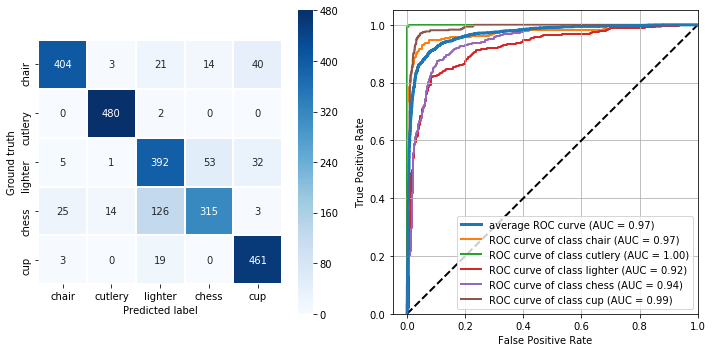

In [59]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
from itertools import cycle
from sklearn.preprocessing import label_binarize
from scipy import interp
from sklearn.metrics import roc_curve, auc, confusion_matrix
%matplotlib inline 

base_path = '../Matrix-Capsules-EM-PyTorch/results/cnn_roc.pt'
predict, labels, logits = torch.load(base_path)

y = label_binarize(labels, classes=[0, 1, 2, 3, 4])
n_classes = y.shape[1]
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y[:, i], logits[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y.ravel(), logits.view(-1))
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

classes = ['chair', 'cutlery', 'lighter', 'chess', 'cup']
M = confusion_matrix(labels, predict)

fig = plt.figure(figsize=(10,5))
plt.subplot(121)
sns.heatmap(M, linewidths=1, square=True, xticklabels=classes, yticklabels=classes, cmap='Blues', annot=True, fmt='d')
#plt.title('Confusion matrix example')
plt.xlabel('Predicted label')
plt.ylabel('Ground truth')
plt.savefig('confusion_matrix.pdf')

lw=2

# Plot all ROC curves
plt.subplot(122)
plt.plot(fpr['micro'], tpr['micro'],
         label=f'average ROC curve (AUC = {roc_auc["micro"]:0.2f})',
         linestyle='-', linewidth=lw+1, zorder=10)

#plt.plot(fpr["macro"], tpr["macro"],
#         label=f'macro-average ROC curve (area = {roc_auc["macro"]:0.2f})',
#         linestyle='--', linewidth=lw)

#colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
#for i, color in zip(range(n_classes), colors):
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=lw,
             label=f'ROC curve of class {classes[i]} (AUC = {roc_auc[i]:.2f})', zorder=1)

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.grid()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

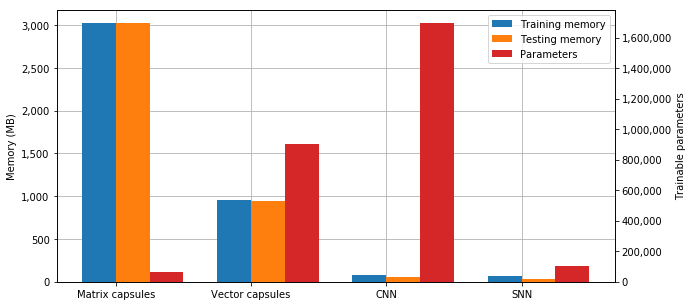

In [91]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
from itertools import cycle
from sklearn.preprocessing import label_binarize
from scipy import interp
from sklearn.metrics import roc_curve, auc, confusion_matrix
import matplotlib
%matplotlib inline 
bw = .25
idx = np.arange(4)
networks = ['Matrix capsules', 'Vector capsules', 'CNN', 'SNN']
plt.figure(figsize=(10,5))
plt.grid()
plt.gca().set_axisbelow(True)
bar1 = plt.bar(idx, [3025.47,956.16,76.94,64.29], bw, label='Training memory')
bar2 = plt.bar(idx+bw, [3023.48,945.76,57.52,38.46], bw, label='Testing memory')
plt.ylabel('Memory (MB)')
plt.gca().get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
bar3 = plt.gca().twinx().bar(idx+2*bw, [67442,901536,1696645,103005], bw, label='Parameters', color='C3')

plt.gca().get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.ylabel('Trainable parameters')
plt.legend((bar1, bar2, bar3), ['Training memory', 'Testing memory', 'Parameters'], loc='upper right')
plt.gca().set_xticks(idx + bw / 2)
plt.gca().set_xticklabels(networks)

plt.savefig('memory.pdf')